In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import IPython
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from IPython.display import HTML, display
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import random

import shap




<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

I am choosing Option1. Here we are trying to determine whether a credit card client will fail to pay their credit card bill (default) or not.

The dataset has 25 columns, which is quite a lot, therefore I am thinking of finding a way to reduce the number of columns, either through averaging or complete removal. ColumnsThere is an ID of each client, which can probably be removed. There is LIMIT_BAL (amount of given credit), SEX (male or female) , EDUCATION(Education level:1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown), MARRIAGE(marriage status:1=married, 2=single, 3=others) ,AGE(Age in years). Finally there are 3 sets of 6 features that are PAY_X(Repayment status in a certain month),BILL_AMTX(Amount of bill statement in a month), and PAY_AMTX(amount of previous payment in a certain month). 

Due to the fact that they make up 18 columns, and each number represents one month, I am thinking of finding a way to combine these columns.  

In [3]:
credit_df= pd.read_csv("data/UCI_Credit_Card.csv")
credit_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(credit_df, test_size=0.3, random_state=123)
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

## Class imbalance

In [5]:
fail_df = train_df[train_df['default.payment.next.month'] == 1]
payed_df = train_df[train_df['default.payment.next.month'] == 0]


print(fail_df.shape)
print(payed_df.shape)



(4688, 25)
(16312, 25)


There is definitely a class imbalance in the data, as there are more clients that have not defaulted than clients who have defaulted.

### Comparing the Average LIMIT_BAL in clients that defaulted(1) and those that did not(0) (summary statistic)

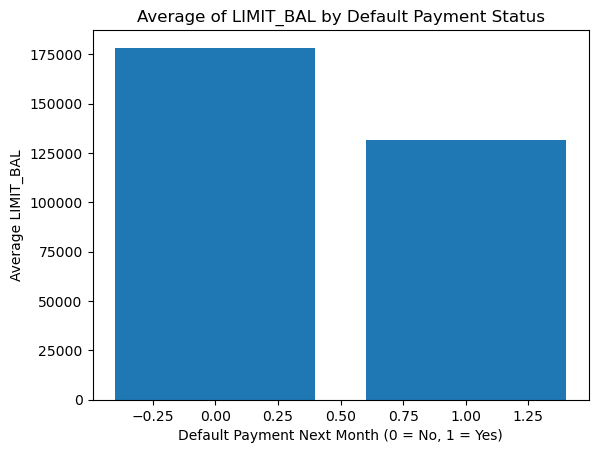

In [6]:
mean_values = train_df.groupby('default.payment.next.month').mean()

plt.bar(mean_values.index, mean_values["LIMIT_BAL"]) 
plt.title(f"Average of LIMIT_BAL by Default Payment Status")
plt.xlabel('Default Payment Next Month (0 = No, 1 = Yes)')
plt.ylabel(f'Average {'LIMIT_BAL'}')
plt.show()

Individuals who defaulted, have on average a significantly lower amount of Credit card balance compared to people who did not default.

### Comparing the Average of PAY_x columns in clients that defaulted(1) and those that did not(0) (summary statistic)

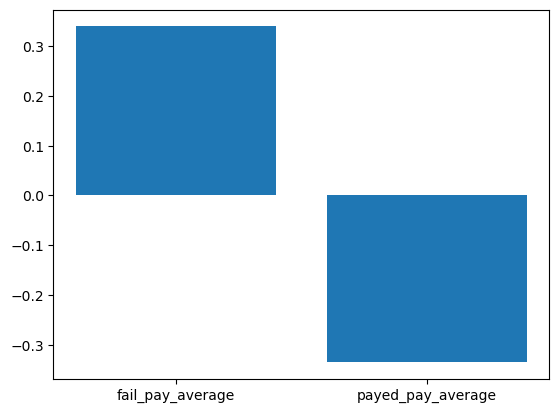

In [7]:
fail_pay_average = fail_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1).mean()
payed_pay_average = payed_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1).mean()

pay_dict = {'fail_pay_average' : fail_pay_average , 'payed_pay_average' : payed_pay_average }


plt.bar(pay_dict.keys(), pay_dict.values())

plt.show()



People who did not default (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
mostly had negative -0.3 meaning on average the payed it on time, however, people who defaulted had the on average a positive value in the PAY column.

### Comparing the Average of BILL_AMTx columns in clients that defaulted(1) and those that did not(0) (summary statistic)

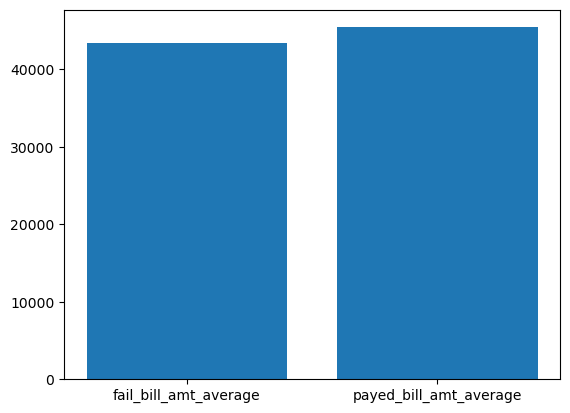

In [8]:
fail_bill_amt_average = fail_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1).mean()
payed_bill_amt_average = payed_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1).mean()

bill_amt_dict = {'fail_bill_amt_average' : fail_bill_amt_average , 'payed_bill_amt_average' : payed_bill_amt_average }


plt.bar(bill_amt_dict.keys(), bill_amt_dict.values())

plt.show()




The average bill amount was similar between the two groups.

### PAY_AMT

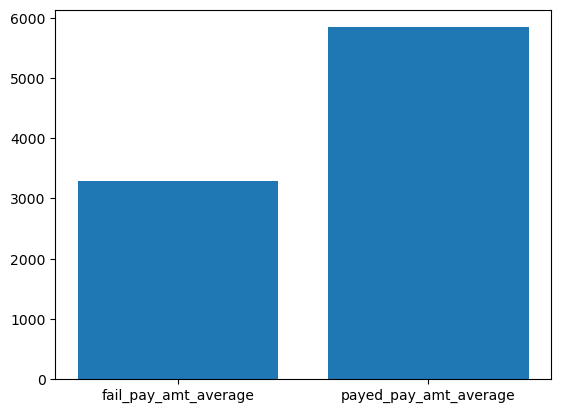

In [9]:
fail_pay_amt_average = fail_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1).mean()
payed_pay_amt_average = payed_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1).mean()


pay_amt_dict = {'fail_pay_amt_average' : fail_pay_amt_average , 'payed_pay_amt_average' : payed_pay_amt_average }


plt.bar(pay_amt_dict.keys(), pay_amt_dict.values())

plt.show()





People who did not default have a significantly higher payment average compared to those who did default.

### Age

C:\Users\meakh\AppData\Local\Temp\ipykernel_14260\1372215637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail_df['AGE_GROUP_5'] = pd.cut(fail_df['AGE'], bins=bins_5, right=False)
C:\Users\meakh\AppData\Local\Temp\ipykernel_14260\1372215637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payed_df['AGE_GROUP_5'] = pd.cut(payed_df['AGE'], bins=bins_5, right=False)


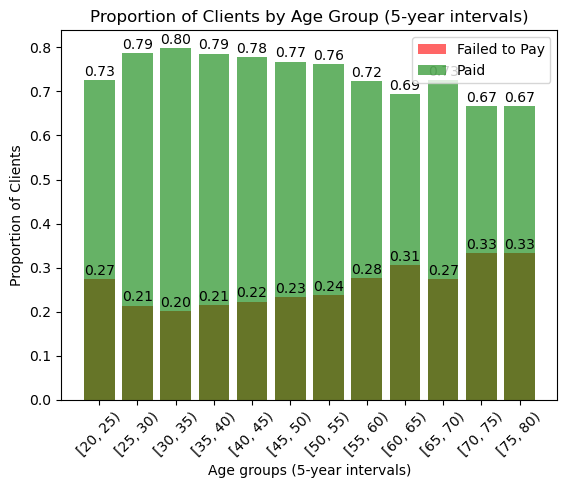

In [10]:
#5 year increments
bins_5 = list(range(0, 101, 5))  
fail_df['AGE_GROUP_5'] = pd.cut(fail_df['AGE'], bins=bins_5, right=False)
payed_df['AGE_GROUP_5'] = pd.cut(payed_df['AGE'], bins=bins_5, right=False) 

#counts
age_fail_counts_5 = fail_df['AGE_GROUP_5'].value_counts().sort_index().to_dict()
age_payed_counts_5 = payed_df['AGE_GROUP_5'].value_counts().sort_index().to_dict()

# proportions(default)
age_proportions_dict_5 = {}
for group in age_fail_counts_5.keys():
    total = age_fail_counts_5[group] + age_payed_counts_5.get(group, 0)
    if total > 0:
        age_proportions_dict_5[group] = age_fail_counts_5[group] / total
        
#proportions(non-default)
age_proportions_payed_5 = {}
for group in age_payed_counts_5.keys():
    total = age_fail_counts_5.get(group, 0) + age_payed_counts_5[group]
    if total > 0:
        age_proportions_payed_5[group] = age_payed_counts_5[group] / total
#labels
x_labels_5 = [str(interval) for interval in age_proportions_dict_5.keys()]

x_labels_payed_5 = [str(interval) for interval in age_proportions_payed_5.keys()]


# default plot
plt.bar(x_labels_5, age_proportions_dict_5.values(), alpha=0.6, label='Failed to Pay', color='red')

# non default plot
plt.bar(x_labels_payed_5, age_proportions_payed_5.values(), alpha=0.6, label='Paid', color='green')

# titles and labels
for i, (label, proportion) in enumerate(age_proportions_dict_5.items()):
    plt.text(i, proportion + 0.01, f'{proportion:.2f}', ha='center', color='black')

# Add porportion labels and graph lables
for i, (label, proportion) in enumerate(age_proportions_payed_5.items()):
    plt.text(i, proportion + 0.01, f'{proportion:.2f}', ha='center', color='black')
plt.title("Proportion of Clients by Age Group (5-year intervals)")
plt.xlabel("Age groups (5-year intervals)")
plt.ylabel("Proportion of Clients")
plt.xticks(rotation=45)
plt.legend()


plt.show()

people between 20-25 and over 55 years old default more often when compared to over 5-year age increments

### Categorical variables

### Sex

#### more females in the data set

In [11]:
male_df = train_df[train_df['SEX'] == 1]
female_df = train_df[train_df["SEX"] == 2]

print(male_df.shape)
print(female_df.shape)

(8384, 25)
(12616, 25)


There are more females in the data set

{2: 0.2075142675967026, 1: 0.24689885496183206}


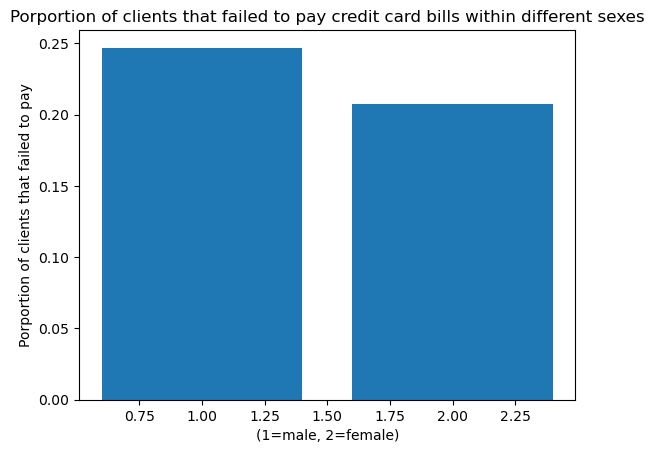

In [12]:


sex_fail_counts = fail_df['SEX'].value_counts().to_dict()
sex_payed_counts = payed_df['SEX'].value_counts().to_dict()
sex_proportions_dict = {}

for i in sex_fail_counts.keys():
    sex_proportions_dict[i] = sex_fail_counts[i]/(sex_fail_counts[i] + sex_payed_counts[i])

print(sex_proportions_dict)
plt.bar(sex_proportions_dict.keys(), sex_proportions_dict.values()) 
plt.title("Porportion of clients that failed to pay credit card bills within different sexes")
plt.xlabel('(1=male, 2=female)')
plt.ylabel('Porportion of clients that failed to pay')
plt.show()



In people that did not default the portion of females is higher by about 5.5% compared to clients that did not.

### Education 

{2: 7504, 1: 5965, 3: 2532, 5: 195, 4: 76, 6: 30, 0: 10}
{2: 2311, 1: 1468, 3: 884, 5: 15, 4: 5, 6: 5, 0: 0}
{2: 0.23545593479368312, 1: 0.1974976456343334, 3: 0.25878220140515223, 5: 0.07142857142857142, 4: 0.06172839506172839, 6: 0.14285714285714285, 0: 0.0}


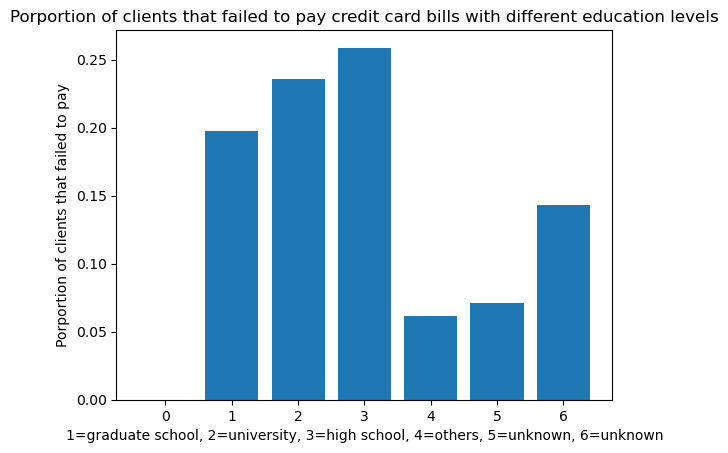

In [13]:
ed_fail_counts = fail_df['EDUCATION'].value_counts().to_dict()
ed_payed_counts = payed_df['EDUCATION'].value_counts().to_dict()
ed_fail_counts[0] = 0

print(ed_payed_counts)
print(ed_fail_counts)
ed_proportions_dict = {}

for i in ed_fail_counts.keys():
    ed_proportions_dict[i] = ed_fail_counts[i]/(ed_fail_counts[i] + ed_payed_counts[i])

print(ed_proportions_dict)
plt.bar(ed_proportions_dict.keys(), ed_proportions_dict.values()) 
plt.title("Porportion of clients that failed to pay credit card bills with different education levels")
plt.xlabel('1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown')
plt.ylabel('Porportion of clients that failed to pay')
plt.show()


The group who have other or unknown statuses have the lowest porportion of clients defaults, and with increasing education level, there is lower default rate. 

### Marriage status

{2: 8824, 1: 7287, 3: 171, 0: 30}
{2: 2386, 1: 2240, 3: 58, 0: 4}
{2: 0.2128456735057984, 1: 0.23512123438648053, 3: 0.25327510917030566, 0: 0.11764705882352941}


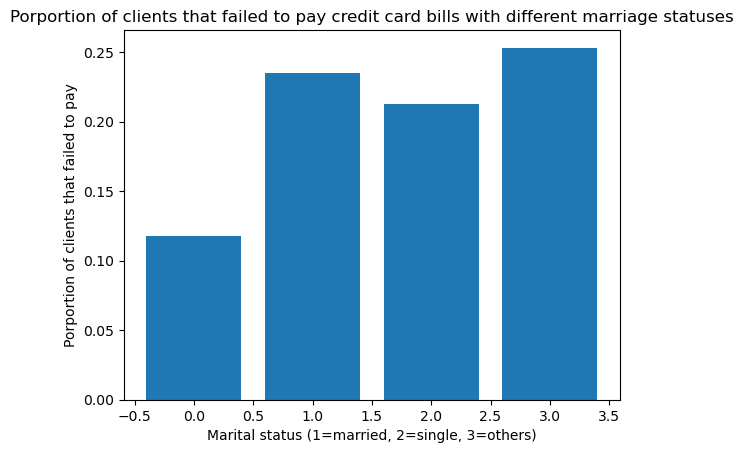

In [14]:
mar_fail_counts = fail_df['MARRIAGE'].value_counts().to_dict()
mar_payed_counts = payed_df['MARRIAGE'].value_counts().to_dict()

print(mar_payed_counts)
print(mar_fail_counts)
mar_proportions_dict = {}

for i in mar_fail_counts.keys():
    mar_proportions_dict[i] = mar_fail_counts[i]/(mar_fail_counts[i] + mar_payed_counts[i])

print(mar_proportions_dict)
plt.bar(mar_proportions_dict.keys(), mar_proportions_dict.values()) 
plt.title("Porportion of clients that failed to pay credit card bills with different marriage statuses")
plt.xlabel('Marital status (1=married, 2=single, 3=others)')
plt.ylabel('Porportion of clients that failed to pay')
plt.show()



Married individuals defaulted more often compared to single individuals. "Others" group defaulted most. There was also an unexplained "0" group that was not explained in Kaggle.

### Metrics

Due to the fact that we are trying to predict individuals that are going to fail to pay their credit card bill/default for the next month, we are going to care a lot about false negatives. This is because it will be more costly if our model says someone will not default when in fact they would in reality(false negative), compared to the model saying the someone will default, when they are not going to default (false postive).
Thus in this project, I will prioritize the recall, and keep accuracy in mind (secondary metric). 

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

### Creating a column for the mean of the PAY column

In [15]:
train_df['pay_average'] = train_df[["PAY_0" , "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].mean(axis=1)
test_df['pay_average'] = test_df[["PAY_0" , "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].mean(axis=1)

### Creating a column for the mean of the PAY_AMT columns

In [16]:
train_df['pay_AMT_average'] = train_df[["PAY_AMT1" , "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].mean(axis=1)
test_df['pay_AMT_average'] = test_df[["PAY_AMT1" , "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].mean(axis=1)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

#### Decisions per feature:

- ID.  Remove, not a good predictor

- LIMIT_BAL: Keep, good predictor with clear significance, needs to be scaled and imputed

- SEX: Drop, females are only 5 percent more likely to pay their credit card bill on time, not that significant.

- EDUCATION:  lower education levels seem to have higher levels of failure to pay, however difference is very slim.

- MARRIAGE: drop, single individuals are about 2% more likely to default, which is very insignificant, and there are various "other" and "unknown" groups which are unclear and can be detrimental to the model if I keep them in the same category or make new categories from them.

- AGE: remove, there is no clear correlation between age and whether a client will default.

- PAY_0,2-6: good predictor, with significant different, take an average, and then scale

- BILL_AMT1-6: drop, no significance

- PAY_AMT1-6: good predictor, with significant different, take an average, and then scale

- default.payment.next.month: target, no transformations needed

In [17]:
numeric_feat = ["LIMIT_BAL", "pay_average", "pay_AMT_average"]


drop_feat = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", 
             "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", 
             'ID', "SEX", "EDUCATION", "MARRIAGE", 
             "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "AGE"]


ct = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_feat),
    ("drop", drop_feat))

print(ct)


ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['LIMIT_BAL', 'pay_average',
                                  'pay_AMT_average']),
                                ('drop', 'drop',
                                 ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                  'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0',
                                  'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                                  'ID', 'SEX', 'EDUCATION', 'MARRIAGE',
                                  'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                                  'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                  'AGE'])])


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [18]:
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df["default.payment.next.month"]


X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df["default.payment.next.month"]



In [19]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)



scoring = {'accuracy': 'accuracy', 'recall': 'recall'}
cv_results = cross_validate(dummy_clf, X_train, y_train, scoring=scoring, return_train_score=True)



accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='binary', zero_division=1)


print("Accuracy on test set:", accuracy)
print("Recall on test set:", recall)
print("Cross-validation accuracy:", cv_results['test_accuracy'].mean())
print("Cross-validation recall:", cv_results['test_recall'].mean())

results  = pd.DataFrame(cv_results).mean()
results


Accuracy on test set: 0.7835555555555556
Recall on test set: 0.0
Cross-validation accuracy: 0.7767619047619047
Cross-validation recall: 0.0


fit_time          0.003401
score_time        0.003395
test_accuracy     0.776762
train_accuracy    0.776762
test_recall       0.000000
train_recall      0.000000
dtype: float64

test_recall   :   0


test_accuracy  :   77.6762

- due to the class imbalance (more 0's/negatives), it does not predict any positives/1's. This explains the relatively high accuracy and 0 recall.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [20]:
pipe_log = make_pipeline(ct, LogisticRegression())

scoring = {
    'recall': 'recall',
    'accuracy': 'accuracy'}


param_grid_log = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "logisticregression__class_weight": [None,'balanced']}

random_search_log = RandomizedSearchCV(pipe_log,                                    
                  param_distributions = param_grid_log, 
                  n_iter=1000,
                  scoring=scoring,
                  refit='recall',
                  n_jobs=-1,
                  return_train_score=True,
                  random_state=123)

random_search_log.fit(X_train, y_train)
log_df_sorted = pd.DataFrame(random_search_log.cv_results_)[
    [
        "mean_test_accuracy",
        "std_test_accuracy",
        "mean_test_recall",
        "std_test_recall",           
        'mean_train_recall',
        'mean_train_accuracy',
        "mean_fit_time",
        'param_logisticregression__class_weight',
        'param_logisticregression__C']
].sort_values(
    by=["mean_test_recall"],  # Sorting criteria
    ascending=False  # Sort in descending order
).T

log_df_sorted


c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 14 is smaller than n_iter=1000. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,1,7,9,11,13,3,5,6,8,10,12,4,2,0
mean_test_accuracy,0.620857,0.613476,0.613381,0.613381,0.613381,0.614238,0.613381,0.797048,0.797048,0.797048,0.797048,0.79719,0.795619,0.783238
std_test_accuracy,0.002953,0.006326,0.006373,0.006373,0.006373,0.006366,0.006582,0.001829,0.001829,0.001829,0.001829,0.001865,0.001584,0.00086
mean_test_recall,0.648675,0.645261,0.645261,0.645261,0.645261,0.645048,0.645048,0.160199,0.160199,0.160199,0.160199,0.159133,0.146119,0.045648
std_test_recall,0.014398,0.013681,0.013681,0.013681,0.013681,0.013254,0.013731,0.011815,0.011815,0.011815,0.011815,0.011559,0.009324,0.003524
mean_train_recall,0.649477,0.646384,0.646384,0.646384,0.646384,0.646171,0.646224,0.159236,0.159343,0.159396,0.159396,0.15801,0.147291,0.045648
mean_train_accuracy,0.620607,0.613512,0.613488,0.613488,0.613488,0.614464,0.613524,0.797048,0.797036,0.797036,0.797036,0.796833,0.795869,0.783143
mean_fit_time,0.047988,0.043078,0.04697,0.042682,0.050888,0.039518,0.037275,0.031959,0.036755,0.033539,0.038388,0.062623,0.032108,0.037054
param_logisticregression__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,None,None,None,None,None,None,None
param_logisticregression__C,0.001,1.0,10.0,100.0,1000.0,0.01,0.1,1.0,10.0,100.0,1000.0,0.1,0.01,0.001


In [21]:
print(random_search_log.best_score_)
print(random_search_log.best_params_)
print("standard deviation is 0.014398")

0.6486752849565255
{'logisticregression__class_weight': 'balanced', 'logisticregression__C': 0.001}
standard deviation is 0.014398


## Summary

Here, I used a logistic regression model to predict whether the person would default or not. Due to the fact that we care about reducing the false negatives the most, I ranked the results based on the mean validation recall score. The highest mean test recall is approximately 65 percent, with an accuracy of 62 percent. This recall was achieved by C=0.001 and a class_weight = 'balanced', which tackles the class imbalance in the data set by assuming more weight for the positives in this case. Changing the C does not have a significant effect on the recall, however not having balanced classes leads to much lower recall.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

### RandomForestClassifier

In [22]:
pipe_rfc = make_pipeline(ct, RandomForestClassifier(random_state=123, class_weight="balanced"))
cv_rfc_results = cross_validate(pipe_rfc, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_rfc = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_rfc_results.items()}
summary_df_rfc = pd.DataFrame([mean_std_results_rfc], index=["Mean ± Std"])

### KNeighborsClassifier

In [23]:
pipe_knn = make_pipeline(ct, KNeighborsClassifier())
cv_knn_results = cross_validate(pipe_knn, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_knn = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_knn_results.items()}
summary_df_knn = pd.DataFrame([mean_std_results_knn], index=["Mean ± Std"])

### XGBClassifier

In [24]:
pipe_xgb = make_pipeline(ct, XGBClassifier(random_state=123))
cv_xgb_results = cross_validate(pipe_xgb, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_xgb = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_xgb_results.items()}
summary_df_xgb = pd.DataFrame([mean_std_results_xgb], index=["Mean ± Std"])


### LogisticRegression(from last question for comparison)

In [25]:
pipe_log = make_pipeline(ct, LogisticRegression( C=0.001 ,class_weight = 'balanced', random_state=123))
cv_log_results = cross_validate(pipe_log, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_log = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_log_results.items()}
summary_df_log = pd.DataFrame([mean_std_results_log], index=["Mean ± Std"])

## Summary:

In [26]:
unmodified_summary_df = pd.DataFrame({
    "LogisticRegression(C=0.001 ,class_weight = 'balanced')" : mean_std_results_log,
    'Random Forest': mean_std_results_rfc,
    'K-Neighbors': mean_std_results_knn,
    'XGBoost': mean_std_results_xgb
}).T



unmodified_summary_df

,fit_time,score_time,test_recall,train_recall,test_accuracy,train_accuracy
"LogisticRegression(C=0.001 ,class_weight = 'balanced')",0.023 ± 0.004,0.010 ± 0.003,0.649 ± 0.014,0.649 ± 0.002,0.621 ± 0.003,0.621 ± 0.002
Random Forest,1.728 ± 0.052,0.084 ± 0.005,0.369 ± 0.015,0.987 ± 0.001,0.750 ± 0.005,0.980 ± 0.001
K-Neighbors,0.026 ± 0.007,0.259 ± 0.052,0.330 ± 0.004,0.445 ± 0.007,0.786 ± 0.005,0.834 ± 0.002
XGBoost,0.117 ± 0.017,0.015 ± 0.003,0.305 ± 0.007,0.404 ± 0.009,0.796 ± 0.003,0.839 ± 0.002


### Summary 

Model Comparisons:


- Random Forest (original)
    - Very high train metrics and a lower test recall compared to the logistic regresion model, which indicates severe overfitting. It does achieve a higher test accuracy, but the drop in recall makes it less desirable given that recall is our main focus. score and fit time are both slower compared to logregression. 

- K-Neighbors (original)
    - K-Neighbors has lower recall metrics than Logistic Regression for both train and test sets, which indicates underfitting. Although its test accuracy is higher, the recall drop makes it less effective than Logistic Regression. Fit time is close to equal to logistic regression, but the score time is way longer.


- XGBoost (original)

    - Comparison: Similar to K-Neighbors, XGBoost has lower train and test recall compared to Logistic Regression, which suggests underfitting. While it shows decent accuracy, its recall performance falls short of Logistic Regression. Both fit time and score time are longer than logisticregression, but the score time is quite close.



Best Model : Logistic Regression achieves the highest test recall (0.649), while maintaining a relatively high accuracy , with the lowest socre and fit times.

Random Forest demonstrates significant overfitting with a high train recall (0.987) and a notably low test recall (0.369), making it less reliable for our primary goal of maximizing recall.
K-Neighbors and XGBoost show underfitting, with both test recalls lower than Logistic Regression (0.330 and 0.305 respectively), although K-Neighbors shows better accuracy than Logistic Regression.

Therefore, none of the models beat the Logistic Regression model, as it maintains a balance of accuracy while maximizing recall with good speed.










<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

#### I decided to include Sex and marriage status to see whether they would affect the results

In [27]:
numeric_feat = ["LIMIT_BAL", "pay_average", "pay_AMT_average"]
pass_through = ["SEX"] 
one_hot = ["MARRIAGE"]


drop_feat = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", 
             "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", 
             'ID', "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "AGE"]


ct_modified = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_feat),
    ("passthrough", pass_through),
    (make_pipeline(OneHotEncoder()),["MARRIAGE"]),
    ("drop", drop_feat)  
    )


### 1. Logistic Regression Model

In [28]:
scoring = ['accuracy', 'recall'] 

pipe_log_mod = make_pipeline(ct_modified, LogisticRegression( C=0.001 ,class_weight = 'balanced', random_state= 123))
cv_results_log_mod = cross_validate(pipe_log_mod, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_log_mod = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_results_log_mod.items()}

### 2. Random Forest Classifier Model

In [29]:
pipe_rfc_mod = make_pipeline(ct_modified, RandomForestClassifier(random_state=123, class_weight="balanced"))
cv_rfc_mod_results = cross_validate(pipe_rfc_mod, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_rfc_mod = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_rfc_mod_results.items()}

### 3. K-Neighbors Classifier Model

In [30]:
pipe_knn_mod = make_pipeline(ct_modified, KNeighborsClassifier())
cv_knn_mod_results = cross_validate(pipe_knn_mod, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_knn_mod = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_knn_mod_results.items()}

### 4. XGBoost Classifier Model

In [31]:
pipe_xgb_mod = make_pipeline(ct_modified, XGBClassifier(random_state=123))
cv_xgb_results_mod = cross_validate(pipe_xgb_mod, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_xgb_mod = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_xgb_results_mod.items()}

## Summary

In [32]:
modified_summary_df = pd.DataFrame({
    'Modified LogisticRegression(C=0.001 ,class_weight = balanced': mean_std_results_log_mod,
    'Modified Random Forest': mean_std_results_rfc_mod,
    'Modified K-Neighbors': mean_std_results_knn_mod,
    'Modified XGBoost': mean_std_results_xgb_mod
})


modified_summary_df = modified_summary_df.T

modified_summary_df

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
"Modified LogisticRegression(C=0.001 ,class_weight = balanced",0.028 ± 0.003,0.010 ± 0.003,0.627 ± 0.004,0.628 ± 0.003,0.646 ± 0.016,0.647 ± 0.003
Modified Random Forest,1.862 ± 0.135,0.124 ± 0.045,0.765 ± 0.005,0.989 ± 0.000,0.346 ± 0.012,0.992 ± 0.001
Modified K-Neighbors,0.044 ± 0.012,0.287 ± 0.063,0.782 ± 0.006,0.835 ± 0.001,0.324 ± 0.011,0.446 ± 0.008
Modified XGBoost,0.142 ± 0.032,0.015 ± 0.001,0.799 ± 0.005,0.844 ± 0.002,0.311 ± 0.012,0.419 ± 0.009


In [33]:
unmodified_summary_df

,fit_time,score_time,test_recall,train_recall,test_accuracy,train_accuracy
"LogisticRegression(C=0.001 ,class_weight = 'balanced')",0.023 ± 0.004,0.010 ± 0.003,0.649 ± 0.014,0.649 ± 0.002,0.621 ± 0.003,0.621 ± 0.002
Random Forest,1.728 ± 0.052,0.084 ± 0.005,0.369 ± 0.015,0.987 ± 0.001,0.750 ± 0.005,0.980 ± 0.001
K-Neighbors,0.026 ± 0.007,0.259 ± 0.052,0.330 ± 0.004,0.445 ± 0.007,0.786 ± 0.005,0.834 ± 0.002
XGBoost,0.117 ± 0.017,0.015 ± 0.003,0.305 ± 0.007,0.404 ± 0.009,0.796 ± 0.003,0.839 ± 0.002


##### Due to the fact that adding the two columns do not make a significant difference in the metrics, I'm going to use the unmodified version for the rest of the project. 

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

### RandomForestClassifier hyper parameter optimization

In [34]:
param_grid_rfc = {
    "randomforestclassifier__max_depth": [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "randomforestclassifier__n_estimators":[3, 5, 10, 15, 20]}

random_search_rfc = RandomizedSearchCV(pipe_rfc,                                    
                  param_distributions = param_grid_rfc, 
                  n_iter=100,
                  scoring=scoring,
                  refit='recall',
                  return_train_score=True,random_state=123)

random_search_rfc.fit(X_train, y_train)
rfc_df_sorted = pd.DataFrame(random_search_rfc.cv_results_)[
    [
        "mean_test_accuracy",
        "std_test_accuracy",
        "mean_test_recall",
        "std_test_recall",
        "mean_fit_time",
        "rank_test_recall",
        "params",
        'mean_train_recall',
        'mean_train_accuracy',
        'param_randomforestclassifier__n_estimators', 
        'param_randomforestclassifier__max_depth'
    ]
].sort_values(
    by=["mean_test_recall"],
    ascending=False
).T

rfc_df_sorted

c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,6,9,7,8,0,5,1,14,12,13,...,39,29,32,52,42,57,37,47,22,27
mean_test_accuracy,0.736381,0.739143,0.740143,0.739048,0.566238,0.738238,0.732381,0.758286,0.754667,0.756762,...,0.754952,0.754714,0.755143,0.754857,0.754857,0.754857,0.754857,0.754857,0.753048,0.754714
std_test_accuracy,0.008058,0.008325,0.005466,0.006886,0.010718,0.012008,0.050014,0.006645,0.005895,0.005317,...,0.004204,0.004927,0.006431,0.006649,0.006649,0.006649,0.006649,0.006649,0.005374,0.007004
mean_test_recall,0.635243,0.631613,0.630113,0.629051,0.625852,0.620515,0.581703,0.576364,0.574229,0.57359,...,0.36028,0.360279,0.34556,0.344493,0.344493,0.344493,0.344493,0.344493,0.344069,0.344065
std_test_recall,0.01579,0.014317,0.026645,0.020878,0.015521,0.035238,0.07569,0.014571,0.017272,0.015528,...,0.008739,0.010736,0.006467,0.007864,0.007864,0.007864,0.007864,0.007864,0.01069,0.008995
mean_fit_time,0.048838,0.151408,0.08132,0.118053,0.026205,0.030636,0.031778,0.23498,0.121323,0.195506,...,0.34186,0.354504,0.176819,0.180395,0.182698,0.186909,0.181914,0.182389,0.178237,0.179609
rank_test_recall,1,2,3,4,5,6,7,8,9,10,...,47,52,53,54,54,54,54,54,59,60
params,"{'randomforestclassifier__n_estimators': 5, 'r...","{'randomforestclassifier__n_estimators': 20, '...","{'randomforestclassifier__n_estimators': 10, '...","{'randomforestclassifier__n_estimators': 15, '...","{'randomforestclassifier__n_estimators': 3, 'r...","{'randomforestclassifier__n_estimators': 3, 'r...","{'randomforestclassifier__n_estimators': 5, 'r...","{'randomforestclassifier__n_estimators': 20, '...","{'randomforestclassifier__n_estimators': 10, '...","{'randomforestclassifier__n_estimators': 15, '...",...,"{'randomforestclassifier__n_estimators': 20, '...","{'randomforestclassifier__n_estimators': 20, '...","{'randomforestclassifier__n_estimators': 10, '...","{'randomforestclassifier__n_estimators': 10, '...","{'randomforestclassifier__n_estimators': 10, '...","{'randomforestclassifier__n_estimators': 10, '...","{'randomforestclassifier__n_estimators': 10, '...","{'randomforestclassifier__n_estimators': 10, '...","{'randomforestclassifier__n_estimators': 10, '...","{'randomforestclassifier__n_estimators': 10, '..."
mean_train_recall,0.647823,0.644731,0.642652,0.642864,0.626173,0.63556,0.581909,0.668569,0.667342,0.667076,...,0.938833,0.93926,0.883212,0.883105,0.883105,0.883105,0.883105,0.883105,0.886785,0.883372
mean_train_accuracy,0.741262,0.745524,0.743798,0.744964,0.568512,0.742429,0.733298,0.796786,0.794429,0.796536,...,0.968202,0.968357,0.954131,0.954119,0.954119,0.954119,0.954119,0.954119,0.95506,0.954202
param_randomforestclassifier__n_estimators,5,20,10,15,3,3,5,20,10,15,...,20,20,10,10,10,10,10,10,10,10


In [35]:
param_grid_knn = {
    "kneighborsclassifier__n_neighbors": [1,2,3,4, 5, 10, 25, 50, 100, 200],
    "kneighborsclassifier__weights": ['distance', "uniform"]}

random_search_knn = RandomizedSearchCV(pipe_knn,                                    
                  param_distributions = param_grid_knn, 
                  n_iter=10,
                  scoring=scoring,
                  refit='recall',
                  return_train_score=True,random_state=123)

random_search_knn.fit(X_train, y_train)

knn_df_sorted = pd.DataFrame(random_search_knn.cv_results_)[
    [
        "mean_test_accuracy",
        "std_test_accuracy",
        "mean_test_recall",
        "std_test_recall",     
        "mean_fit_time",
        "rank_test_recall", 
        "params",
        'mean_train_recall',
        'mean_train_accuracy',
        "param_kneighborsclassifier__n_neighbors",
        "param_kneighborsclassifier__weights"]
    
].sort_values(
    by=["mean_test_recall"],  # Sorting criteria
    ascending=False  # Sort in descending order
).T
knn_df_sorted


,8,2,4,1,7,0,3,9,6,5
mean_test_accuracy,0.724,0.746143,0.758952,0.770048,0.782333,0.78581,0.807429,0.805667,0.805667,0.78881
std_test_accuracy,0.003335,0.005943,0.005321,0.005939,0.003375,0.003475,0.001828,0.001889,0.002449,0.003354
mean_test_recall,0.37287,0.359427,0.353029,0.344923,0.339591,0.337245,0.324875,0.311863,0.308023,0.236778
std_test_recall,0.011817,0.007005,0.002758,0.005563,0.00265,0.002969,0.012413,0.008218,0.006493,0.010095
mean_fit_time,0.022529,0.026104,0.019383,0.02122,0.02081,0.019227,0.020468,0.021595,0.018621,0.02077
rank_test_recall,1,2,3,4,5,6,7,8,9,10
params,"{'kneighborsclassifier__weights': 'distance', ...","{'kneighborsclassifier__weights': 'distance', ...","{'kneighborsclassifier__weights': 'distance', ...","{'kneighborsclassifier__weights': 'uniform', '...","{'kneighborsclassifier__weights': 'distance', ...","{'kneighborsclassifier__weights': 'distance', ...","{'kneighborsclassifier__weights': 'uniform', '...","{'kneighborsclassifier__weights': 'uniform', '...","{'kneighborsclassifier__weights': 'uniform', '...","{'kneighborsclassifier__weights': 'uniform', '..."
mean_train_recall,0.951259,0.945446,0.943846,0.542822,0.94166,0.94166,0.326631,0.322472,0.3101,0.339057
mean_train_accuracy,0.980774,0.98344,0.983607,0.856393,0.98394,0.98394,0.808119,0.809226,0.806869,0.834429
param_kneighborsclassifier__n_neighbors,1,3,5,3,25,50,100,50,200,4


In [36]:
param_grid_xgb = {
    #"xgbclassifier__n_estimators": [1, 5, 10, 25,50, 100, 200, 500],  # Number of trees
    "xgbclassifier__max_depth": [3, 5, 7,10, 15, 20],
    "xgbclassifier__scale_pos_weight": [1, 3, 5,  7 , 10, 12, 15]
    }  # Features to consider at each split}

random_search_xgb = RandomizedSearchCV(pipe_xgb,                                    
                  param_distributions = param_grid_xgb, 
                  n_iter=200,
                  n_jobs= -1,
                  scoring=scoring,
                  refit='recall',
                  return_train_score=True, random_state=123)

random_search_xgb.fit(X_train, y_train)



xgb_df_sorted = pd.DataFrame(random_search_xgb.cv_results_)[
    [
        "mean_test_accuracy",
        "std_test_accuracy",# Accuracy
        
               # Precision
        "mean_test_recall",
        "std_test_recall",          # Recall 
        "mean_fit_time",
        "rank_test_recall",        # Rank by accuracy
        'mean_train_recall',
        'mean_train_accuracy',
        'param_xgbclassifier__scale_pos_weight', 
        'param_xgbclassifier__max_depth'
    ]
].sort_values(
    by=["mean_test_recall"],  # Sorting criteria
    ascending=False  # Sort in descending order
).T

xgb_df_sorted

c:\Users\meakh\miniconda3\envs\cpsc330\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 42 is smaller than n_iter=200. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,6,5,4,13,12,11,3,20,19,10,...,30,37,29,36,35,28,0,21,14,7
mean_test_accuracy,0.321286,0.364190,0.427952,0.420476,0.459286,0.497095,0.571238,0.514619,0.543286,0.585381,...,0.695619,0.699143,0.722476,0.720571,0.767905,0.772286,0.805333,0.784095,0.792095,0.800000
std_test_accuracy,0.005460,0.006864,0.006056,0.006591,0.005944,0.011020,0.009013,0.006647,0.010648,0.008009,...,0.004872,0.002662,0.007436,0.005555,0.005515,0.005619,0.002976,0.005232,0.002089,0.002474
mean_test_recall,0.965016,0.943898,0.911264,0.902948,0.884174,0.855375,0.824445,0.818898,0.793091,0.790525,...,0.504053,0.491676,0.470775,0.450083,0.343000,0.330628,0.314210,0.311859,0.309304,0.306745
std_test_recall,0.003547,0.006074,0.005755,0.010035,0.003570,0.012340,0.005753,0.013902,0.010171,0.009975,...,0.013490,0.017882,0.012847,0.013606,0.011856,0.014025,0.012306,0.010450,0.011125,0.011330
mean_fit_time,0.158433,0.201793,0.157424,0.188746,0.201684,0.204423,0.163404,0.246147,0.287181,0.196886,...,0.895435,1.348035,0.929926,1.185724,1.016242,0.776961,0.158491,0.386603,0.237549,0.215223
rank_test_recall,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000
mean_train_recall,0.989868,0.978722,0.955152,0.994934,0.987041,0.973816,0.864921,0.999147,0.996374,0.919262,...,0.984428,0.987148,0.943899,0.956111,0.764878,0.705471,0.336231,0.553061,0.446672,0.374679
mean_train_accuracy,0.336452,0.382119,0.449500,0.463893,0.508750,0.553381,0.589048,0.603214,0.635679,0.642595,...,0.901774,0.912536,0.921226,0.930000,0.936488,0.922345,0.814262,0.882095,0.851679,0.829786
param_xgbclassifier__scale_pos_weight,15.000000,12.000000,10.000000,15.000000,12.000000,10.000000,7.000000,15.000000,12.000000,7.000000,...,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
param_xgbclassifier__max_depth,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,3.000000,7.000000,7.000000,5.000000,...,15.000000,20.000000,15.000000,20.000000,20.000000,15.000000,3.000000,10.000000,7.000000,5.000000


## Summary

with a 0.63 ± 0.01 mean recall and accuracy of 0.736 , the randomforestclassifier with n_estimators= 10 and max_depth of 5 seems to be th best balance of overfitting/underfitting and accuracy/recall, and has a similar performance to the linear model used in the previous questions.

The KNN model does not achieve a suitable mean test recall, with the highest one being 0.37. In addition there is a lot of overfitting, as the training accuracies are in the high 90's, eventhough n_neighbors==1. However the test score are quite high comparatively.

With a 0.42 mean accuracy and recall of 0.955 ± 0.05 , the xgb classifer scale_pos_weight = 10 and max_depth of 3 seems to have the highest recall among the models; however, it has a very low accuracy. It also has a high degree of overfiiting as the score is quite high, but it still might be a good option as the recall accuracy is high.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

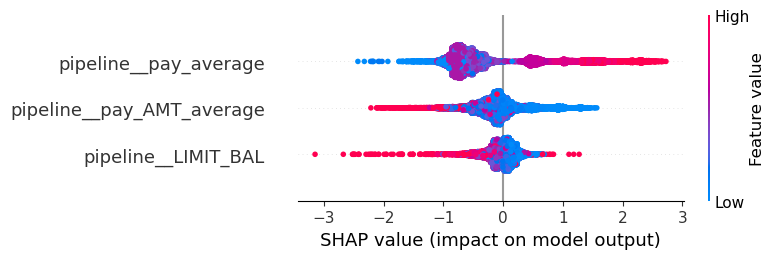

In [37]:
xgb_selected = make_pipeline(ct, XGBClassifier(random_state=123, scale_pos_weight=10, max_depth=3))

xgb_selected.fit(X_train, y_train)

X_train_transformed = xgb_selected.named_steps['columntransformer'].transform(X_train)

# Extract feature names from the ColumnTransformer
feature_names = xgb_selected.named_steps['columntransformer'].get_feature_names_out()

# Initialize SHAP TreeExplainer with the XGBClassifier
explainer = shap.TreeExplainer(xgb_selected.named_steps['xgbclassifier'])

# Calculate SHAP values for the transformed data
shap_values = explainer.shap_values(X_train_transformed)

# Plot the SHAP summary plot with feature names
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)


The graph above exhibit the effect of feature value on how the model predicting positive(default) or negative. 

- For pay_average, which represents the average number of months that each previous credit card payment was overdue/delayed, we can see that higher values (more months delayed/overdue) led to more positive(default) decisions and lower values(likely to be on-time payment) contribute to more negative decision making.

- And for high pay_amt_average, which is the average of perivous credit card payments in months that came before, we can see that very high payments led to more non-default decision making and very low payments lead the model to predict more positively.


- For LIMIT_BAL, which represent the credit card limit, we can see that very high credit limits led to non-default predictions and low credit card balances lead to more negative decisions. However There are some instances of high credit card limit(feature) value that the model is more likely to predict as positive(default).  

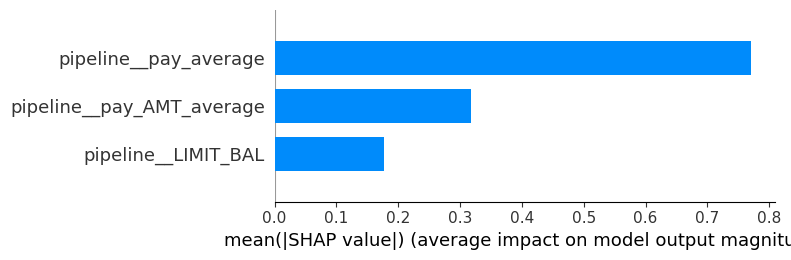

In [38]:
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names, plot_type="bar")

The graphs above exhibit the effect of each feature on predicting whether a client will default on credit card payments. Pay_average has the most impact on the the XGB model's decision making and LIMIT_BAL is the weakest predictor.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

I chose RandomForestClassifier as my best classifer with n_estimators= 5 , max_depth = 5, class_weight="balanced", because it had the best balance of overfitting/underfitting and Accuracy/Recall ratio aong the tuned classifiers.

In [39]:
rfc_vizual = RandomForestClassifier(n_estimators= 5 , max_depth = 5, class_weight="balanced", random_state= 123)

selected_rfc = make_pipeline(ct, rfc_vizual)
selected_rfc.fit(X_train, y_train)

y_pred = selected_rfc.predict(X_test)
y_pred_proba = selected_rfc.predict_proba(X_test)[:, 1] 

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


X_test_transformed_df = pd.DataFrame(ct.transform(X_test), columns = feature_names)





print("Test Accuracy: ", accuracy)
print("Test Recall: ", recall)

Test Accuracy:  0.7488888888888889
Test Recall:  0.6016427104722792


Yes, the test accuracy and recall accuracy are comparable to the results I had previously found. Eventhough the test recall is slightly lower than validation recall, I think that it to be expected because of the natural variations in the training and testing data sets. This could also be attributed to optimization bias,  but since it is only about a 5 percent difference, it leads me to believe that it may just be the variation in the data. 

In [40]:
import lime
import lime.lime_tabular



feature_names = selected_rfc.named_steps['columntransformer'].get_feature_names_out()

X_train_transformed_df = pd.DataFrame(ct.transform(X_train), columns = feature_names) 

X_test_transformed_df = pd.DataFrame(ct.transform(X_test), columns = feature_names)



explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_transformed,
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1'],  # Adjust based on your classes
    mode='classification'
)

instances_to_explain = X_test_transformed_df.iloc[[15]]  

instance_dict = {}


    
instance_df = pd.DataFrame(instance_dict, columns=instance_dict.keys())

for i, instance in enumerate(instances_to_explain.values):
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=rfc_vizual.predict_proba ) 

    print(f"Explanation for observation 15:")
    
    exp.show_in_notebook(show_table=False)

        
print(instances_to_explain)

Explanation for observation 15:


    pipeline__LIMIT_BAL  pipeline__pay_average  pipeline__pay_AMT_average
15            -0.905384               0.868104                  -0.367711


## Explanation

The instance has a prediction probability for two classes: 25% for "Class 0"(non default) and 75% for "Class 1" (default), which indicates the model's confidence in predicting each class for this particular instance.

The feature values are shown at the bottom. From the chart on the top right, they can either contribute towards Class 0 (blue) or Class 1 (orange).

The size of each bar in the represents the magnitude of the contribution toward the class, either increasing or decreasing the likelihood of the prediction for that class.

If the sum of the contributions is zero or larger, then the model would be predicting a positive(default), and if the sum of the contributions is smaller than zero, then the model would be predicting a negative(non default)),

For the 15th observation in the testing data, the LIMIT_BAL feature with a value of -0.90 pushes the prediction toward Class 1 by 0.06.
pay_average with a feature value of 0.86, has a 0.39 contribution towards a positive prediction.

pay_AMT_average with a feature value of -0.367 appears to be neutral and does not contribute to the decision making in this case.

Due to the fact that pay_average and LIMIT_BAL features had positive influence, and pay_AMT_average had no influence the sum adds up to a positive number and therefore the model predicted positive.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

In [41]:
pipe_log_tuned = make_pipeline(ct, LogisticRegression( C=0.001 ,class_weight = 'balanced', random_state= 123))
cv_results_log_tuned = cross_validate(pipe_log_tuned, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_log_tuned = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_results_log_tuned.items()}


pipe_rfc_tuned = make_pipeline(ct, RandomForestClassifier(random_state=123, class_weight="balanced", n_estimators=10, max_depth=5))
cv_rfc_tuned_results = cross_validate(pipe_rfc_tuned, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_rfc_tuned = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_rfc_tuned_results.items()}

pipe_knn_tuned = make_pipeline(ct, KNeighborsClassifier( weights='distance' , n_neighbors=5 ))
cv_knn_tuned_results = cross_validate(pipe_knn_tuned, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_knn_tuned = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_knn_tuned_results.items()}

pipe_xgb_tuned = make_pipeline(ct, XGBClassifier(random_state=123, scale_pos_weight = 10 , max_depth = 3))
cv_xgb_results_tuned = cross_validate(pipe_xgb_tuned, X_train, y_train, scoring=scoring, return_train_score=True)
mean_std_results_xgb_tuned = {metric: f"{np.mean(values):.3f} ± {np.std(values):.3f}" for metric, values in cv_xgb_results_tuned.items()}

tuned_summary_df = pd.DataFrame({
    "Tuned LogisticRegression": mean_std_results_log_tuned,
    'Tuned Random Forest': mean_std_results_rfc_tuned,
    'Tuned K-Neighbors': mean_std_results_knn_tuned,
    'Tuned XGBoost': mean_std_results_xgb_tuned
})


tuned_summary_df = tuned_summary_df.T

tuned_summary_df

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
Tuned LogisticRegression,0.044 ± 0.032,0.009 ± 0.001,0.621 ± 0.003,0.621 ± 0.002,0.649 ± 0.014,0.649 ± 0.002
Tuned Random Forest,0.105 ± 0.005,0.016 ± 0.007,0.740 ± 0.005,0.744 ± 0.011,0.630 ± 0.027,0.643 ± 0.014
Tuned K-Neighbors,0.029 ± 0.013,0.030 ± 0.004,0.759 ± 0.005,0.984 ± 0.001,0.353 ± 0.003,0.944 ± 0.003
Tuned XGBoost,0.092 ± 0.031,0.011 ± 0.001,0.428 ± 0.006,0.450 ± 0.007,0.911 ± 0.006,0.955 ± 0.004


### The Tuned Random Forest model was selected as the best model:

- Balanced Performance: The Random Forest model achieved a good balance between recall and accuracy across both test and train sets. This suggests good generalization without significant overfitting/underfitting.

- High Test Accuracy and Recall: With a test accuracy of 74%, the Random Forest model outperformed the Logistic Regression and XGBoost models, which had significantly lower test accuracy scores (62% and 43%).It also beat the K-Neighbors model by having a much higher test recall metric (63% to 35.3%), which is the main metric we are adhering to.

- Low Overfitting: Unlike K-Neighbors and XGBoost, which show high variance between training and test results (indicating overfitting), the Random Forest model demonstrates closer test and train recall values, which implies a more generalizable model.

### other ideas that were not tried but could potentially improve the performance/interpretability

- One of the ways that can be used to improve the model is different engeneering of the BILL_AMT, PAY_AMT, and PAY columns sets. One would imagine that maybe taking the worst of the three for each observation, or only keeping the the most recent month or 3 months could possibly improve the model.

- Another way that the model could potentially be improved is the tackling of the Education level column, which has two distinct codings for unknown status, and one for "other". Perhaps including that would improve the model, as higher Education level resulted in lower default rate in the exploratory data analysis section. I removed the education column, because I thought it would be misleading for the model given that there are two seperate unknow groups with varying level of defaults and one "other" group.

- Finally, using the AGE column could prove to be beneficial for the model, eventhough the patterns were quite unusual. For example, the ratio of cliented that failed to pay the credit card bills were (5 to 10 percent )higher in individuals under 25 and over 60. However, I assumed that it would actually do more damage to the model because the pattern was ambiguous.  

In [42]:
rfc_vizual = RandomForestClassifier(n_estimators= 5 , max_depth = 5, class_weight="balanced", random_state= 123)
print("Test Accuracy: ", accuracy)
print("Test Recall: ", recall)

Test Accuracy:  0.7488888888888889
Test Recall:  0.6016427104722792


#### The metric I had used was Recall along with accuracy as a secondary measure.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

Firstly, supervised machine learning models can provide powerful insights and very accurate predictions, which is quite fascinating to see. I think machine learning will be able to revolutionize almost all fields, as I believe that there is underlying patterns to everything in this world, and with enough data and computational power a decent model can be trained.

Secondly, I believe that it is very hard to find the right model. Specifically in this assignment, I found the task of selecting the best model to be quite difficult. I think this is because of the fact that we need to balance model and performance metrics, all while ensuring that the chosen model generalizes well to unseen data. And this experience has allowed me to gain a lot of perspective about how nuanced it actually is.

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)